In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore") 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Data Collection

PIMA Diabetes Dataset


In [2]:
diabetes_dataset = pd.read_csv(r'C:\Users\ACER\Downloads\diabetes.csv') 
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploratory Data Analysis 

In [3]:
#Knowing the number of rows and columns of the dataset
diabetes_dataset.shape


(768, 9)

In [4]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#knowing the statistical measures of the data like mean,count,max etc.
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 0-> Non Diabetic
# 1-> Diabetic

<AxesSubplot:xlabel='Outcome', ylabel='count'>

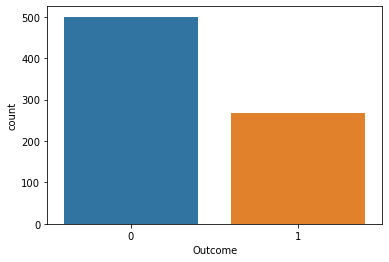

In [8]:
sns.countplot(data=diabetes_dataset,x='Outcome')

# Checking the number of null values if our dataset has.

In [9]:
diabetes_dataset.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [10]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As there is no null value present in our dataset we dont need to clean it

# Data Visualisation


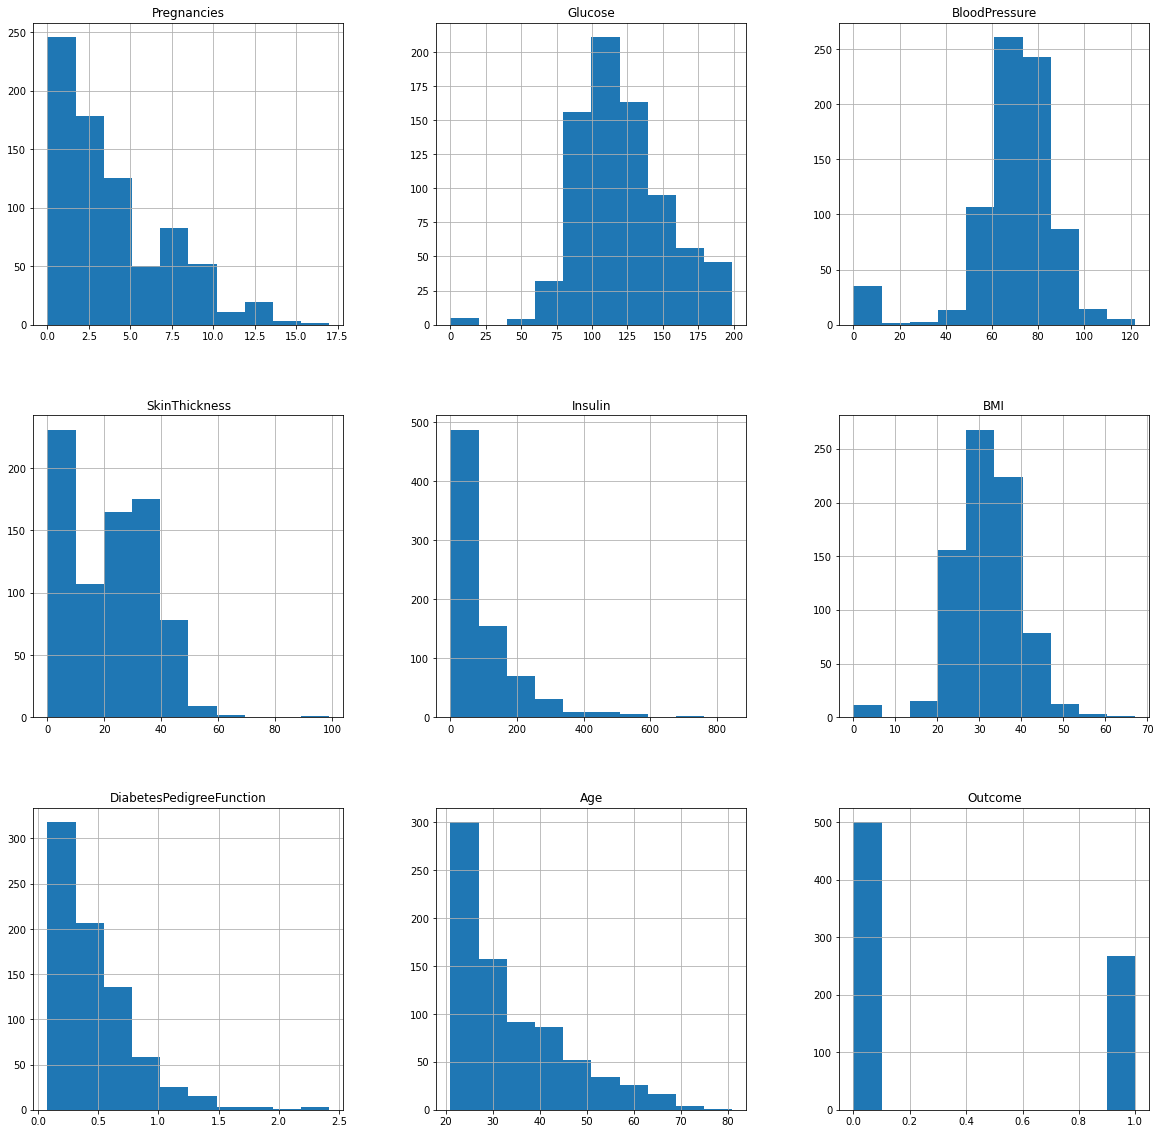

In [11]:
p = diabetes_dataset.hist(figsize = (20,20))

# Visualizing the correlations between the different features:

Text(0.5, 1.0, 'Distribution Of Age')

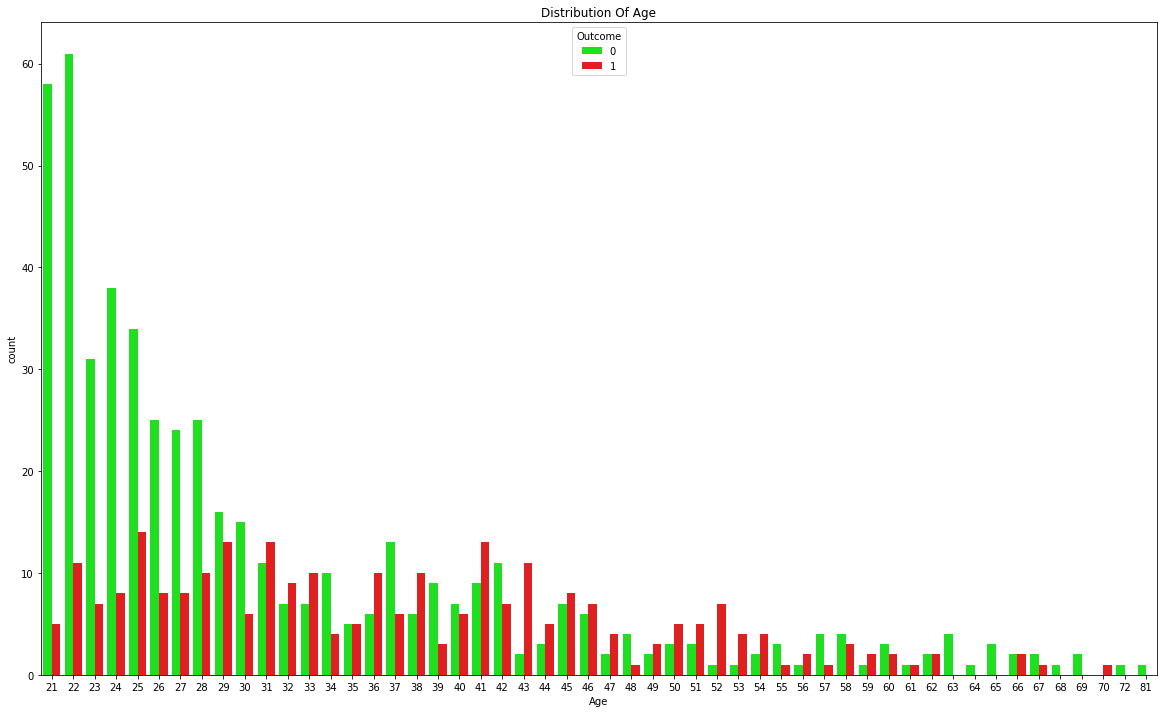

In [12]:
plt.figure(figsize=(20,12))
colors = ["#00FF00", "#FF0000"]
age_countplot = sns.countplot(x = diabetes_dataset['Age'], data = diabetes_dataset, hue ="Outcome",palette = colors)
age_countplot.set_title("Distribution Of Age", color = "#000000")

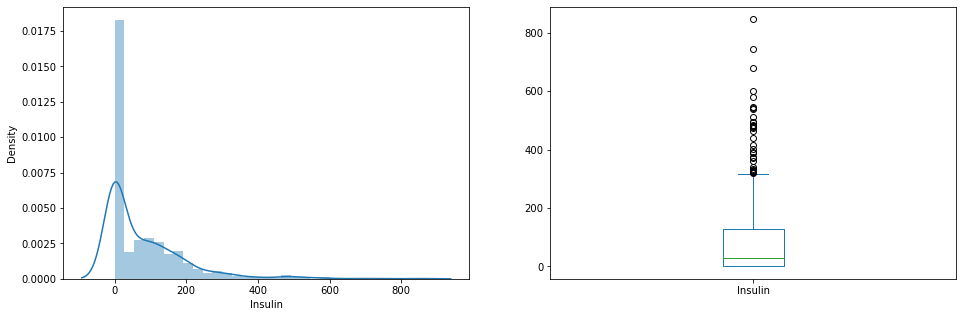

In [13]:
plt.subplot(121), sns.distplot(diabetes_dataset['Insulin'])
plt.subplot(122), diabetes_dataset['Insulin'].plot.box(figsize=(16,5))
plt.show()

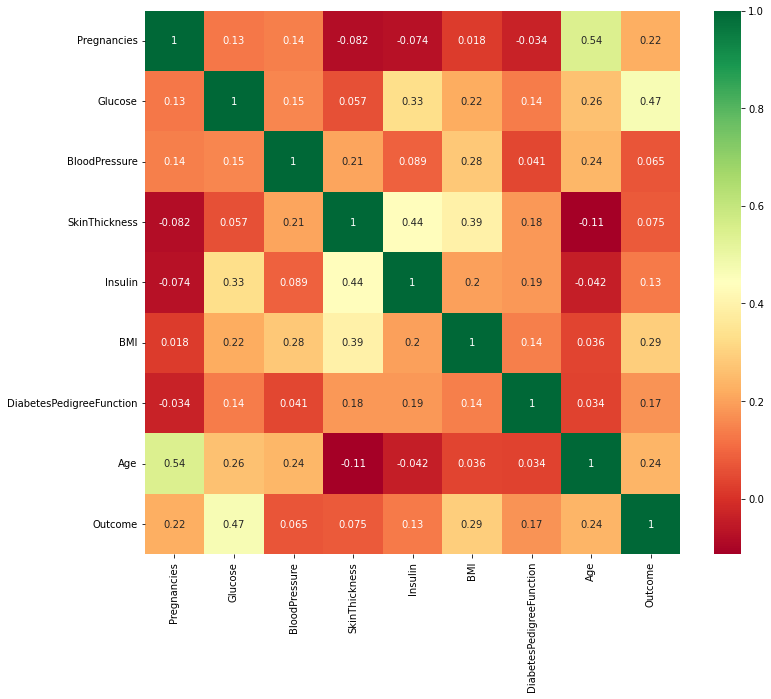

In [14]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_dataset.corr(), annot=True,cmap ='RdYlGn')

In [15]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Splitting the dataset

In [16]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardisation


In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
 sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_dataset.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Model Building
Now we will split the data into training and testing data using the train_test_split function

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the model
Now we train the model using Support Vector Machine (SVM)


In [28]:

svm_classifier = svm.SVC(kernel='linear')

In [29]:
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Accuracy of the model

In [30]:
# Training Dataset


X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [32]:
# Testing Dataset

X_test_prediction = svm_classifier.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction,Y_test)

In [33]:
print('Accuracy score of the testing data :',test_data_accuracy)

Accuracy score of the testing data : 0.7727272727272727


In [34]:
#Classification report and confusion matrix of SVM model
print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test,X_test_prediction))

[[91  9]
 [26 28]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



# Training the model
 Now we train the model using Random Forest

In [35]:

rf_classifier = RandomForestClassifier(n_estimators=200)


In [36]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

# Accuracy of the model

In [37]:
# Training Dataset


X_train_prediction = rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [38]:
print('Accuracy score of the training data :',training_data_accuracy)

Accuracy score of the training data : 1.0


In [39]:
# Testing Dataset

X_test_prediction = rf_classifier.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction,Y_test)

In [40]:
print('Accuracy score of the testing data :',test_data_accuracy)

Accuracy score of the testing data : 0.7272727272727273


In [41]:
#Classification report and confusion matrix of random forest model

print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test,X_test_prediction))

[[86 14]
 [28 26]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



# Training the model
Now we train the model using Logistic regression

In [42]:
lr= LogisticRegression()


In [43]:
model= lr.fit(X_train,Y_train)


# Accuracy of the model

In [44]:
#Training Dataset

X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [45]:
print('Accuracy score of the training data :',training_data_accuracy)

Accuracy score of the training data : 0.7850162866449512


In [46]:
# Testing Dataset

X_test_prediction = lr.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [47]:
print('Accuracy score of the testing data :',test_data_accuracy)

Accuracy score of the testing data : 0.7597402597402597


In [48]:
#Classification report and confusion matrix of Logistic regression model
print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test,X_test_prediction))


[[89 11]
 [26 28]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



# The Conclusion from Model Building
Therefore Support Vector Machine is the best model for this prediction since it has an accuracy_score of 0.77.

# Making a predictive system

In [49]:
input_data = (7,161,86,0,0,30.4,0.165,47)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardized the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm_classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.93691372  1.25518668  0.87340925 -1.28821221 -0.69289057 -0.20212881
  -0.92680285  1.17073215]]
[1]
The person is diabetic


# Saving the trained model

In [50]:
import pickle
# First we save the trained model
filename = 'trained_ML_predictive_model.sav'
pickle.dump(svm_classifier, open(filename, 'wb'))

In [51]:
# Now we load the trained model
loaded_model = pickle.load(open('trained_ML_predictive_model.sav', 'rb'))

In [52]:
input_data = (1,103,30,38,83,43.3,0.183,33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardized the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The person is not diabetic
